# Installation

In [2]:
! pwd

/mnt/c/Users/paul/works/1aki


In [ ]:
# MDAnalysis
! pip install --upgrade MDAnalysis
! pip install --upgrade MDAnalysisTests
! pip install --upgrade MDAnalysisData

# Others
! pip install mdtraj
! pip install nglview
! pip install cython --upgrade
! pip install pytraj

# tsplot for seaborn
! pip install tsplot

# Install Prody
! pip install prody

# Analsysis

### RMSD (SINGLE)

In [3]:
import MDAnalysis as mda
# load the trajectory and topology files
u = mda.Universe('/mnt/c/Users/paul/works/1aki/1aki_md/1AKI_solv_ions.gro', '/mnt/c/Users/paul/works/1aki/1aki_md/md_0_1.xtc')

# select protein atoms for analysis
protein = u.select_atoms('protein')

/home/paul/.local/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:718: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


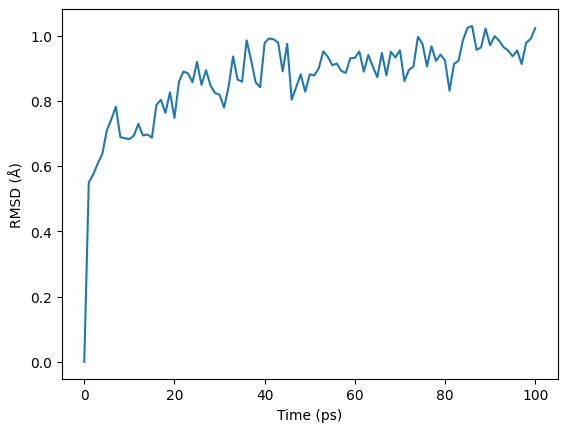

In [4]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import matplotlib.pyplot as plt

# load the trajectory and topology files
u = mda.Universe('/mnt/c/Users/paul/works/1aki/1aki_md/1AKI_solv_ions.gro', '/mnt/c/Users/paul/works/1aki/1aki_md/md_0_1.xtc')

# calculate the RMSD
ref = u.select_atoms('protein')
R = rms.RMSD(u, ref, select='backbone', groupselections=['protein'])
R.run()

# plot the RMSD
plt.plot(R.rmsd[:,1], R.rmsd[:,2])
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (Å)')

# save the plot as a PNG file
plt.savefig('rmsd_plot.png', dpi=300)

# show the plot
plt.show()


### RMSF_CA (SINGLE)

/home/paul/.local/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:887: DeprecationWarning: The `rmsf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


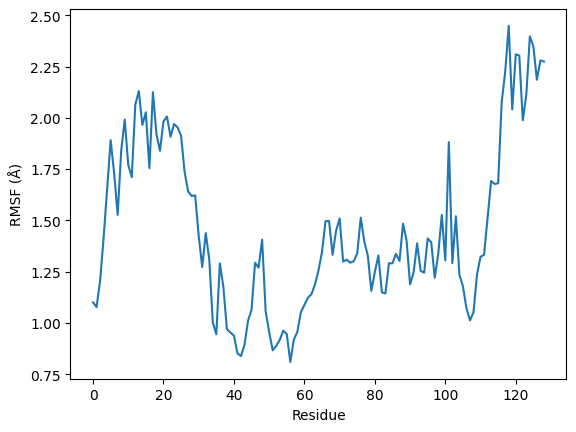

In [5]:
# rmsf ;  c-alpha
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import numpy as np
import matplotlib.pyplot as plt

# load the trajectory and topology files
u = mda.Universe('/mnt/c/Users/paul/works/1aki/1aki_md/1AKI_solv_ions.gro', '/mnt/c/Users/paul/works/1aki/1aki_md/md_0_1.xtc')

# select C-alpha atoms for analysis
calpha = u.select_atoms('protein and name CA')

# calculate the RMSF
R = rms.RMSF(calpha, C_alpha=True).run()
rmsf_analysis = R.rmsf

# plot the RMSF
plt.plot(rmsf_analysis)
plt.xlabel('Residue')
plt.ylabel('RMSF (Å)')

# save the plot as a PNG file
plt.savefig('rmsf_ca_plot.png', dpi=300)

# show the plot
plt.show()


# RG (SINGLE)

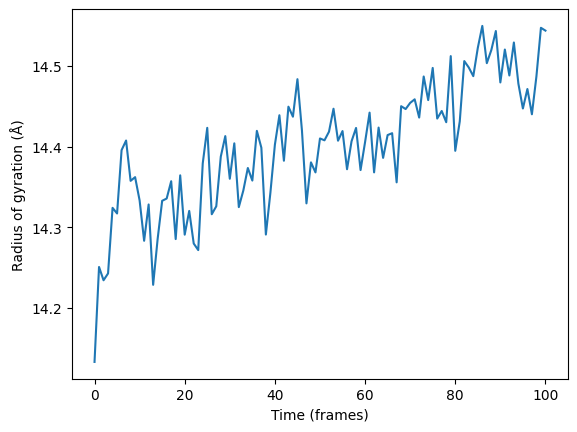

In [7]:
#Rg
# load the trajectory and topology files
u = mda.Universe('/mnt/c/Users/paul/works/1aki/1aki_md/1AKI_solv_ions.gro', '/mnt/c/Users/paul/works/1aki/1aki_md/md_0_1.xtc')

# select protein atoms for analysis
protein = u.select_atoms('protein')

# calculate the radius of gyration
com = np.array([protein.center_of_mass()])
Rg_list = []
for ts in u.trajectory:
    Rg = np.sqrt(np.sum((protein.positions - com)**2)/len(protein))
    Rg_list.append(Rg)

# plot the radius of gyration
plt.plot(np.arange(len(Rg_list)), Rg_list)
plt.xlabel('Time (frames)')
plt.ylabel('Radius of gyration (Å)')


# save the plot as a PNG file
plt.savefig('rg_plot.png', dpi=300)

# show the plot
plt.show()
